In [250]:
import pandas as pd

In [251]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [252]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [253]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [254]:
df.duplicated().sum()

0

In [255]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [256]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [257]:
df.Product.value_counts() # too many features, might provide too much noise

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [258]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [259]:
df.TypeName.value_counts() # perfect cateforial feature

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [260]:
df.Ram.value_counts() # all in GB, so we can convert to int 

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

## Preprocessing

# 

In [261]:
df = df.drop("Product", axis=1) # drop product name

In [262]:
# We're gonna take the company name and make it a categorical feature where it has a 0 or 1 as a value
df = pd.concat([df, pd.get_dummies(df.Company, dtype=int)], axis=1)
df = df.drop("Company", axis=1) # drop company name
# Why not ordonal encoding? Because the company name doesn't have a natural order, so we can't use ordinal encoding. We use one-hot encoding instead.
# One-hot encoding creates a new column for each category in the original column, and assigns a 1 or 0 to indicate the presence of that category in each row.
# If we use ordinal encoding, we might end up with a model that thinks that the company name has a natural order, which it doesn't.
df


,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,0,1,0,0,0,0,0,0,0,0
1299,1317,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,0,1,0,0,0,0,0,0,0,0
1300,1318,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,0,1,0,0,0,0,0,0,0,0
1301,1319,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,0,0,0,0,0,0,0,0,0,0


In [263]:
df = df.join(pd.get_dummies(df.TypeName, dtype=int)) # one-hot encoding for TypeName
df = df.drop("TypeName", axis=1) # drop TypeName

In [264]:
df

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,0,0,0,0,1,0,0,0,0,0
1299,1317,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,0,0,0,0,1,0,0,0,0,0
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,0,0,0,0,0,0,0,1,0,0
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,0,0,0,0,0,0,0,1,0,0


In [265]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1]) # split the screen resolution into two columns, width and height
df["Screen_Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0]) # width
df["Screen_Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1]) # height

In [266]:
df['Screen_Width'] = df['Screen_Width'].astype(int) # convert to float
df['Screen_Height'] = df['Screen_Height'].astype(int) # convert to float

In [267]:
df = df.drop("ScreenResolution", axis=1) # drop ScreenResolution

In [268]:
df["CPU_Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0]) # brand of the CPU
df["CPU_Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1]) # frequency of the CPU

In [269]:
df = df.drop("Cpu", axis=1) # drop CPU

In [270]:
CPU_FREQUENCY_COLUMN = "CPU_Frequency"

df[CPU_FREQUENCY_COLUMN] = df[CPU_FREQUENCY_COLUMN].str.replace("GHz", "") # remove GHz from the frequency
df[CPU_FREQUENCY_COLUMN] = df[CPU_FREQUENCY_COLUMN].astype(float) # convert to float

In [271]:
df['Ram'] = df['Ram'].str.replace("GB", "") # remove GB from the RAM
df['Ram'] = df['Ram'].astype(int) # convert to int

array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Acer'}>,
        <Axes: title={'center': 'Apple'}>],
       [<Axes: title={'center': 'Asus'}>,
        <Axes: title={'center': 'Chuwi'}>,
        <Axes: title={'center': 'Dell'}>,
        <Axes: title={'center': 'Fujitsu'}>,
        <Axes: title={'center': 'Google'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Huawei'}>,
        <Axes: title={'center': 'LG'}>,
        <Axes: title={'center': 'Lenovo'}>,
        <Axes: title={'center': 'MSI'}>,
        <Axes: title={'center': 'Mediacom'}>,
        <Axes: title={'center': 'Microsoft'}>],
       [<Axes: title={'center': 'Razer'}>,
        <Axes: title={'center': 'Samsung'}>,
        <Axes: title={'center': 'Toshiba'}>,
        <Axes: title={'center': 'Vero'}>,
        <Axes: title={'center': 'Xiaom

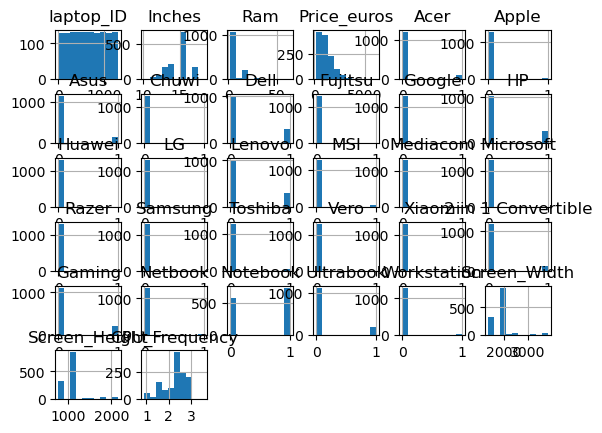

In [272]:
df.hist()

In [273]:
df["Memory_Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0]) # amount of memory

In [274]:
def extract_memory_type(mem):
    if 'Flash Storage' in mem:
        return 'FlashStorage'
    elif 'SSD' in mem:
        return 'SSD'
    elif 'HDD' in mem:
        return 'HDD'
    elif 'Hybrid' in mem:
        return 'Hybrid'
    else:
        return 'Other'

In [275]:
print(df.columns)

Index(['laptop_ID', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu',
       'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom',
       'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation', 'Screen_Width', 'Screen_Height', 'CPU_Brand',
       'CPU_Frequency', 'Memory_Amount'],
      dtype='object')


In [276]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [277]:
df 

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen_Width,Screen_Height,CPU_Brand,CPU_Frequency,Memory_Amount
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,1,0,2560,1600,Intel,2.3,128GB
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,1,0,1440,900,Intel,1.8,128GB
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,1,0,0,1920,1080,Intel,2.5,256GB
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,1,0,2880,1800,Intel,2.7,512GB
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,1,0,2560,1600,Intel,3.1,256GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,0,...,0,0,0,0,0,1920,1080,Intel,2.5,128GB
1299,1317,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,0,...,0,0,0,0,0,3200,1800,Intel,2.5,512GB
1300,1318,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,...,0,0,1,0,0,1366,768,Intel,1.6,64GB
1301,1319,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,...,0,0,1,0,0,1366,768,Intel,2.5,1TB


In [278]:
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)
df = df.join(pd.get_dummies(df["Memory_Type"], dtype=int))
df = df.drop("Memory_Type", axis=1) # drop Memory_Type
df = df.drop("Memory", axis=1) # drop Memory

In [279]:
def turn_memory_into_mb(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1024
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1024 * 1024
    

In [280]:
df["Memory_Amount"] = df["Memory_Amount"].apply(turn_memory_into_mb) # convert to MB


In [281]:
df

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Workstation,Screen_Width,Screen_Height,CPU_Brand,CPU_Frequency,Memory_Amount,FlashStorage,HDD,Hybrid,SSD
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,2560,1600,Intel,2.3,131072.0,0,0,0,1
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,...,0,1440,900,Intel,1.8,131072.0,1,0,0,0
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,...,0,1920,1080,Intel,2.5,262144.0,0,0,0,1
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,...,0,2880,1800,Intel,2.7,524288.0,0,0,0,1
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,...,0,2560,1600,Intel,3.1,262144.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,0,0,...,0,1920,1080,Intel,2.5,131072.0,0,0,0,1
1299,1317,13.3,16,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,0,0,...,0,3200,1800,Intel,2.5,524288.0,0,0,0,1
1300,1318,14.0,2,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,0,...,0,1366,768,Intel,1.6,65536.0,1,0,0,0
1301,1319,15.6,6,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,0,...,0,1366,768,Intel,2.5,1048576.0,0,1,0,0


In [282]:
print(df.columns)

Index(['laptop_ID', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price_euros',
       'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP',
       'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer',
       'Samsung', 'Toshiba', 'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming',
       'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Screen_Width',
       'Screen_Height', 'CPU_Brand', 'CPU_Frequency', 'Memory_Amount',
       'FlashStorage', 'HDD', 'Hybrid', 'SSD'],
      dtype='object')


In [283]:
df["Weight"] = df["Weight"].str[:-2] # remove kg from the weight
df["Weight"] = df["Weight"].astype(float) # convert to float

In [284]:
df["GPU_Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0]) # brand of the GPU 
df = df.drop("Gpu", axis=1) # drop GPU

In [285]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [286]:
df = df.join(pd.get_dummies(df.OpSys, dtype=int)) # one-hot encoding for OpSys
df = df.drop("OpSys", axis=1) # drop OpSys

In [287]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,GPU_Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,AMD,0,0,0,0,0,1,0,0,0


In [288]:
print(df.columns)

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Screen_Width', 'Screen_Height',
       'CPU_Brand', 'CPU_Frequency', 'Memory_Amount', 'FlashStorage', 'HDD',
       'Hybrid', 'SSD', 'GPU_Brand', 'Android', 'Chrome OS', 'Linux',
       'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7',
       'macOS'],
      dtype='object')


In [289]:
cpu_categories = pd.get_dummies(df["CPU_Brand"], dtype=int) # one-hot encoding for CPU Brand
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns] # rename columns to avoid confusion with other categories

df = pd.concat([df, cpu_categories], axis=1) # concatenate the new columns with the original dataframe
df = df.drop("CPU_Brand", axis=1) # drop CPU Brand

In [290]:
gpu_categories = pd.get_dummies(df["GPU_Brand"], dtype=int) # one-hot encoding for gpu Brand
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns] # rename columns to avoid confusion with other categories

df = pd.concat([df, gpu_categories], axis=1) # concatenate the new columns with the original dataframe
df = df.drop("GPU_Brand", axis=1) # drop CPU Brand

In [291]:
print(df.columns)

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Screen_Width', 'Screen_Height',
       'CPU_Frequency', 'Memory_Amount', 'FlashStorage', 'HDD', 'Hybrid',
       'SSD', 'Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS',
       'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS', 'AMD_CPU',
       'Intel_CPU', 'Samsung_CPU', 'AMD_GPU', 'ARM_GPU', 'Intel_GPU',
       'Nvidia_GPU'],
      dtype='object')


<Axes: title={'center': 'Correlation Matrix'}>

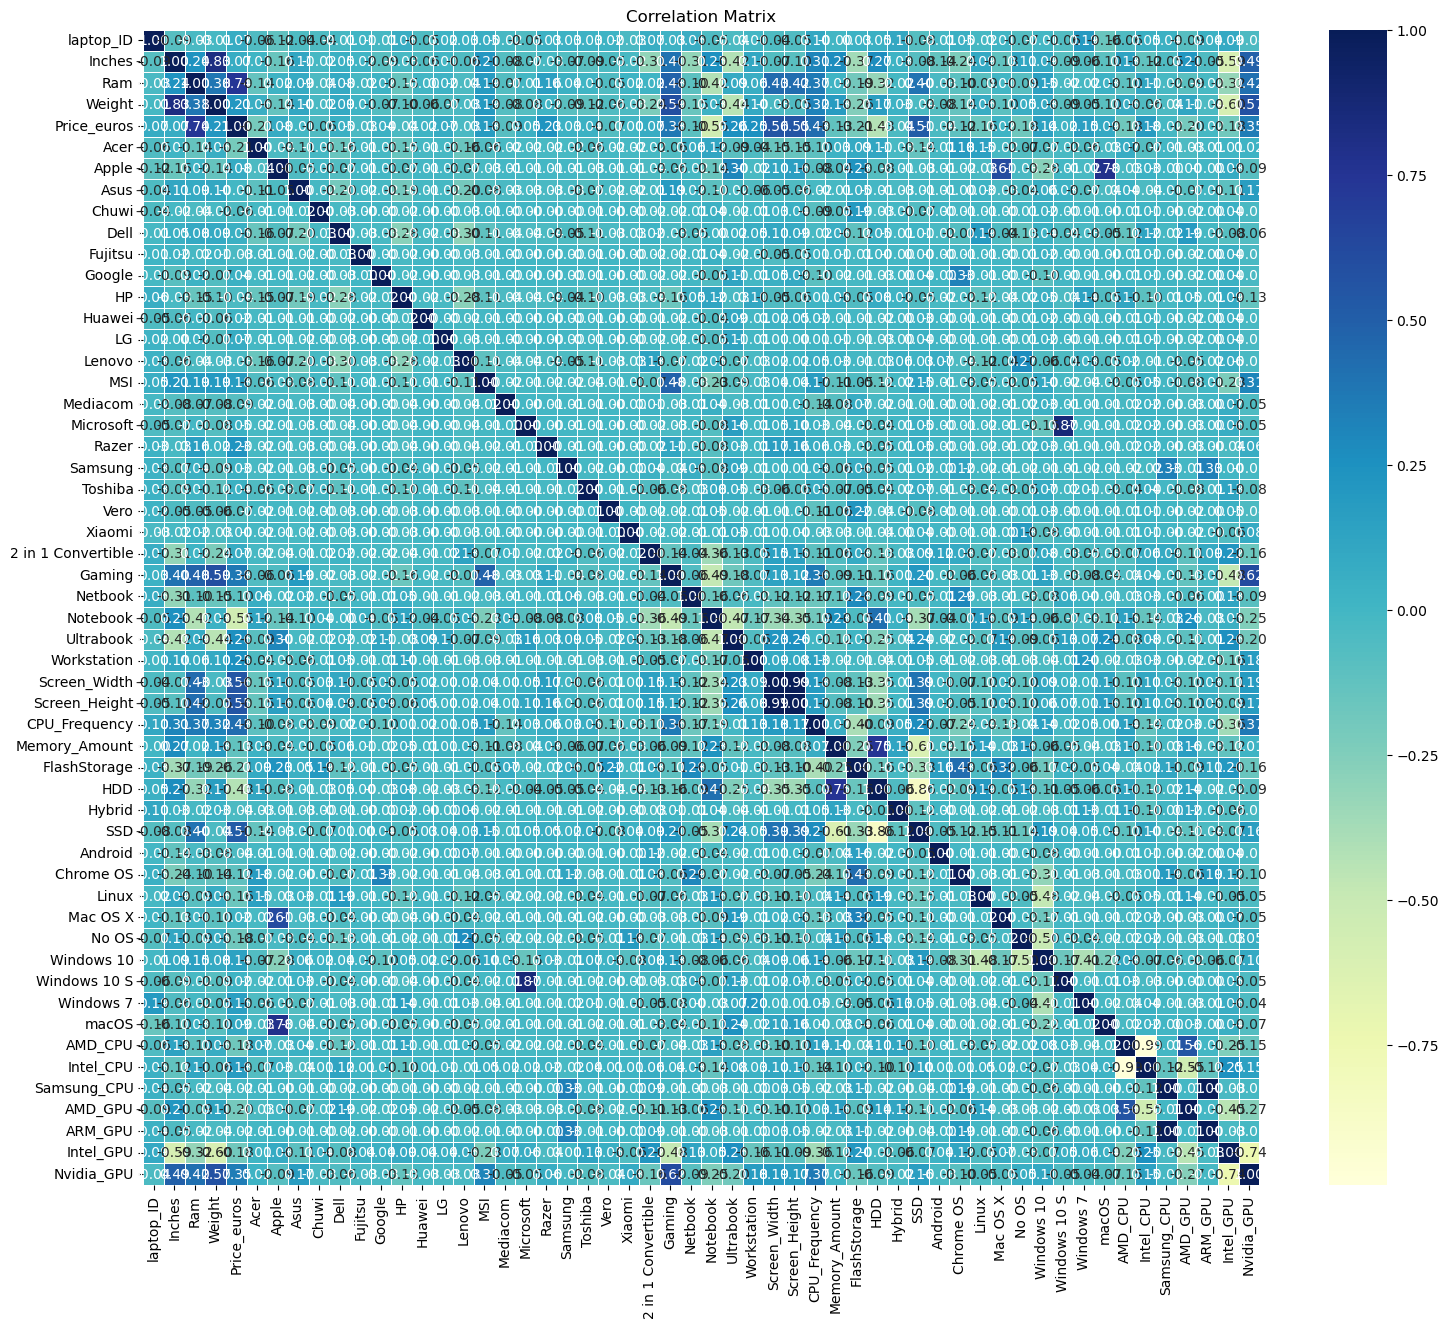

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

In [293]:
target_correlations = df.corr()["Price_euros"].apply(abs).sort_values()

In [294]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory_Amount         0.125363
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [295]:
target_correlations[21:]

Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory_Amount         0.125363
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI                   0.180100
AMD_CPU               0.180111
Intel_CPU             0.181127
Intel_GPU             0.184205
AMD_GPU               0.199415
Acer                  0.208349
Weight                0.210370
FlashStorage          0.210823
Razer                 0.233756
Workstation           0.249752
Ultrabook             0.255658
Nvidia_GPU            0.348797
Gaming                0.375789
HDD                   0.426121
CPU_Frequency         0.430293
SSD                   0.513609
Notebook              0.549248
Screen_Height         0.552809
Screen_Width          0.556529
Ram                   0.743007
Price_eu

In [296]:
selected_features = target_correlations[target_correlations > 0.2].index.tolist() # select features with correlation greater than 0.15


In [297]:
selected_features

['Acer',
 'Weight',
 'FlashStorage',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU_Frequency',
 'SSD',
 'Notebook',
 'Screen_Height',
 'Screen_Width',
 'Ram',
 'Price_euros']

In [298]:
limited_df = df[selected_features] # select only the features with correlation greater than 0.15

<Axes: title={'center': 'Correlation Matrix (Limited Features)'}>

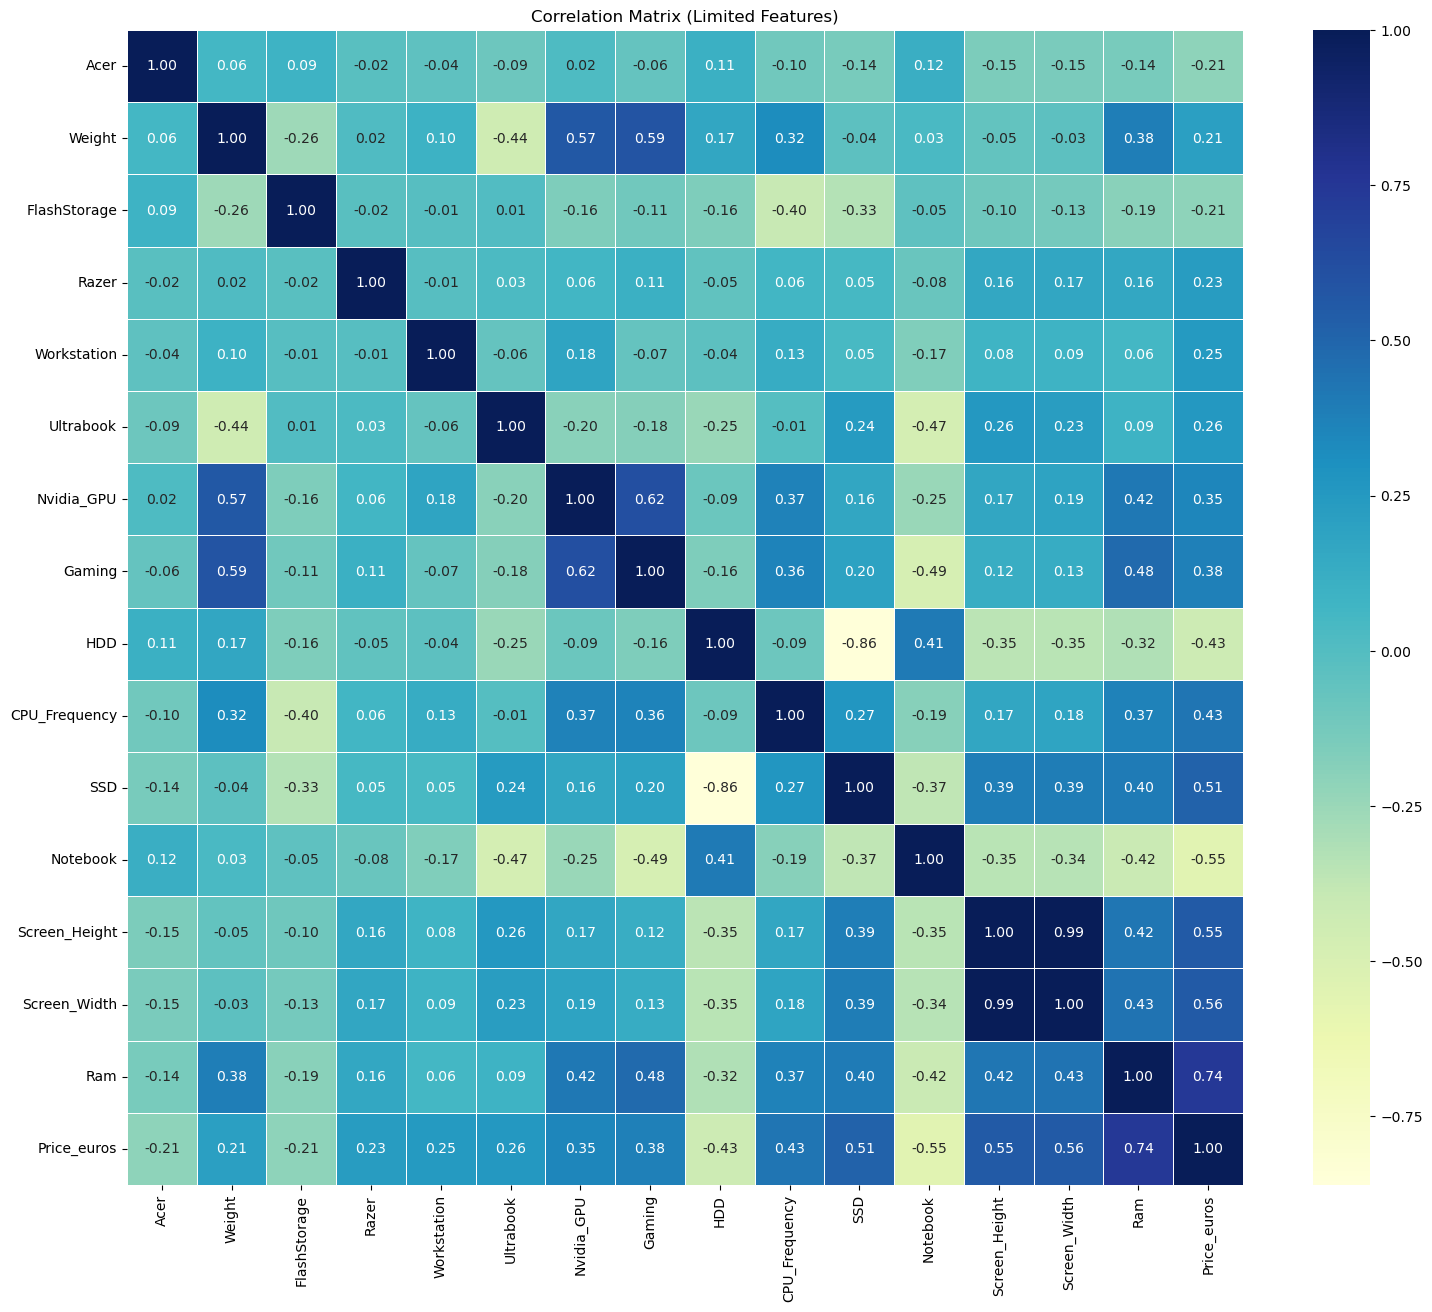

In [299]:
plt.figure(figsize=(18, 15))
plt.title("Correlation Matrix (Limited Features)")
sns.heatmap(limited_df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

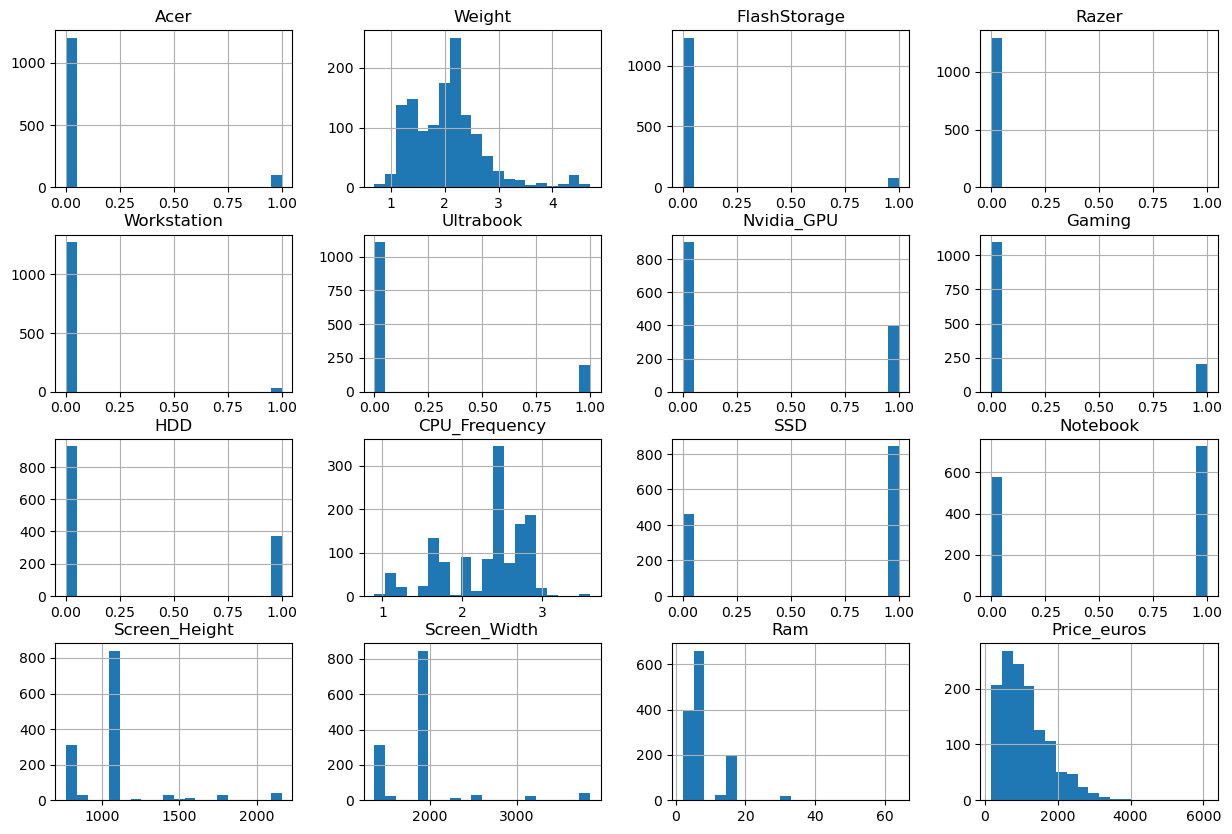

In [300]:
limited_df.hist(figsize=(15, 10), bins=20)
plt.show()

In [301]:
## Columns like Columns like Razer, Workstation, Flash Storage, and Windows 7 have very high skewness 
# (e.g., Razer: 13.55, Workstation: 6.48) suggesting they are highly non-normal and likely have outliers.
# Normalization (Min-Max scaling) is preferred for these columns
## Columns like Intel_GPU and Nvidia_GPU have skewness values close to 0, suggesting they are closer to a normal distribution.
# Standardization (Z-score scaling) is suitable for these.
## Columns such as Weight, Price_euros, Ram, HDD, and Gaming have moderate skewness values.
# These can benefit from standardization, as they are somewhat closer to normal but may still have some skewness.

In [302]:
print(limited_df.columns)

Index(['Acer', 'Weight', 'FlashStorage', 'Razer', 'Workstation', 'Ultrabook',
       'Nvidia_GPU', 'Gaming', 'HDD', 'CPU_Frequency', 'SSD', 'Notebook',
       'Screen_Height', 'Screen_Width', 'Ram', 'Price_euros'],
      dtype='object')


In [303]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Prepare the data
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [304]:
# 2. Create the model
forest = RandomForestRegressor(
    random_state=42,
    n_estimators=500  # Example: more trees for more stable predictions
)
forest.fit(X_train, y_train) # fit the model to the training data

RandomForestRegressor(n_estimators=500, random_state=42)

In [305]:
forest.score(X_test, y_test) # score the model on the test data

0.8125166805784141

In [307]:
import numpy as np 

# R² score interpretation:
print(f"Model explains {forest.score(X_test, y_test)*100:.2f}% of variance")

# Better metrics for regression:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = forest.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} €")

Model explains 81.25% of variance
MAE: 202.43 €
RMSE: 327.07 €


In [308]:
y_pred = forest.predict(X_test)

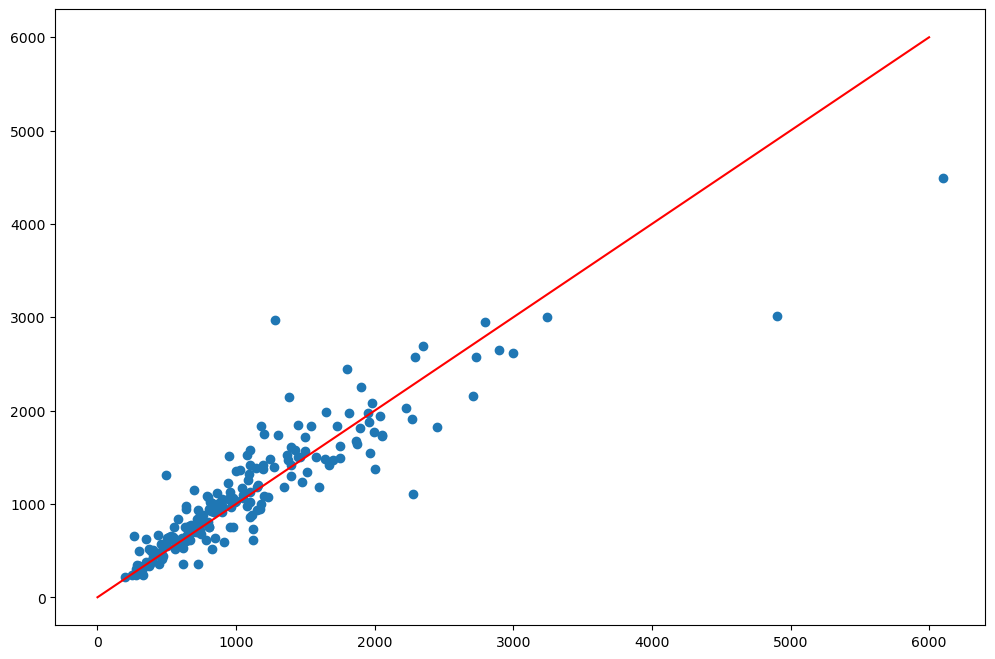

In [309]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred) # scatter plot of actual vs predicted values
plt.plot(range(0, 6000), range(0, 6000), color='red') # line of best fit


In [310]:
new_data = X_test.iloc[[0]]

prediction = forest.predict(new_data) # make predictions on the test data

print(f"Predicted price: {prediction[0]:.2f} €")
print(f"Actual price: {y_test.iloc[0]:.2f} €")

Predicted price: 1414.74 €
Actual price: 1672.00 €


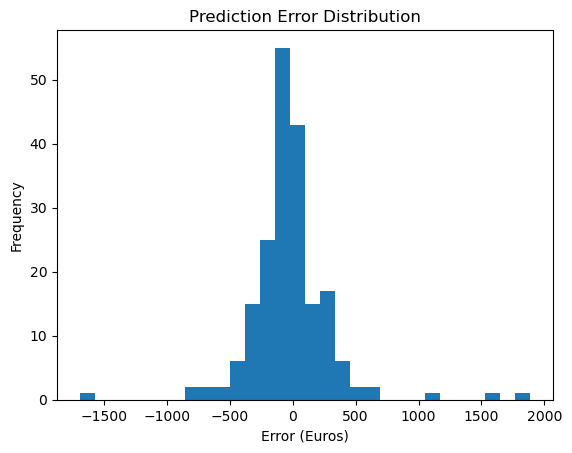

In [311]:
import matplotlib.pyplot as plt
errors = y_test - y_pred
plt.hist(errors, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Error (Euros)')
plt.ylabel('Frequency')
plt.show()


## Pickling the Model file for Deployment

In [312]:
import joblib
# Save the model

with open('model.joblib', 'wb') as file:
    joblib.dump(forest, file)  # Save the model to a file

In [313]:
joblib_model = joblib.load(open('model.joblib', 'rb'))  # Load the model from the file

In [314]:
joblib_model.predict(new_data)  # Make predictions with the loaded model

array([1414.745])